In [24]:
import geopandas as gpd
from matplotlib.patches import RegularPolygon
from shapely.geometry import Polygon
import matplotlib.pyplot as plt 
import numpy as np
import rasterio as rio
geo = gpd.read_file("S:\\antpodGIS\\geojson\\FarmKanchi.geojson")
geo

,id,geometry
0,1,"MULTIPOLYGON (((80.06658 12.82279, 80.07059 12..."


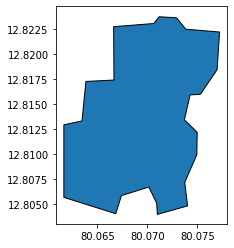

In [10]:
geo.plot(edgecolor='black')

In [11]:
geo.bounds

,minx,miny,maxx,maxy
0,80.061601,12.804031,80.077165,12.823788


In [12]:
type(geo)

geopandas.geodataframe.GeoDataFrame

In [13]:
xmin,ymin,xmax,ymax =  geo.total_bounds
side = 0.0005

In [14]:
rows = int(np.ceil((ymax-ymin) /  side))
rows

40

In [15]:
cols = int(np.ceil((xmax-xmin) / side))
cols

32

In [16]:
XleftOrigin = xmin
XrightOrigin = xmin + side
YtopOrigin = ymax
YbottomOrigin = ymax- side

In [17]:
polygons =[]
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ytop - side
        Ybottom = Ybottom - side
    XleftOrigin = XleftOrigin + side
    XrightOrigin = XrightOrigin + side

In [18]:
grid = gpd.GeoDataFrame({'geometry':polygons})
grid

,geometry
0,"POLYGON ((80.06160 12.82379, 80.06210 12.82379..."
1,"POLYGON ((80.06160 12.82329, 80.06210 12.82329..."
2,"POLYGON ((80.06160 12.82279, 80.06210 12.82279..."
3,"POLYGON ((80.06160 12.82229, 80.06210 12.82229..."
4,"POLYGON ((80.06160 12.82179, 80.06210 12.82179..."
...,...
1275,"POLYGON ((80.07710 12.80629, 80.07760 12.80629..."
1276,"POLYGON ((80.07710 12.80579, 80.07760 12.80579..."
1277,"POLYGON ((80.07710 12.80529, 80.07760 12.80529..."
1278,"POLYGON ((80.07710 12.80479, 80.07760 12.80479..."


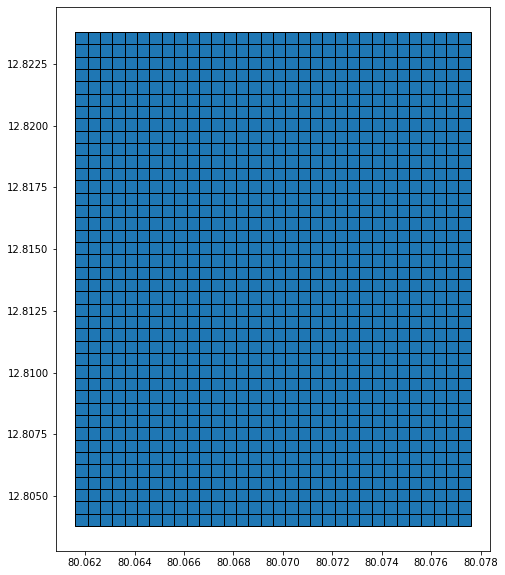

In [19]:
grid.plot(figsize = (10,10), edgecolor='k')

In [20]:
land = gpd.overlay(grid,geo)

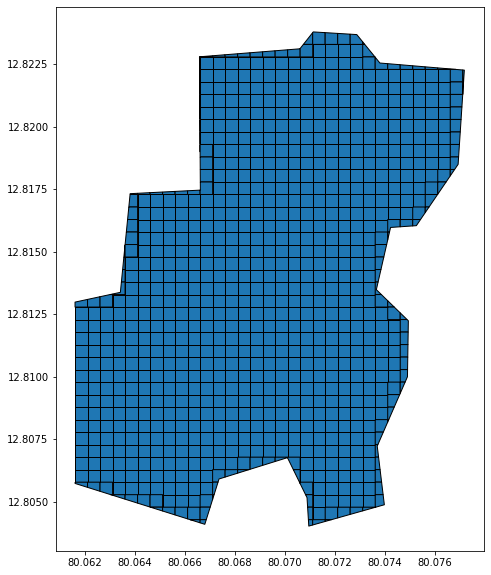

In [21]:
land.plot(figsize = (10,10), edgecolor = 'k')

In [ ]:
land.to_file('output.geojson', driver='GeoJSON')